# Spectrum Level

This notebook acts as proof-of-concept for the noise generators and also examples for how to use them.

## Broadband noise

For a fixed length signal, this creates and ideal white noise signal with sinusoid's of random phase within the given frequency range

Target: 0,  	Spectrum Level: 0.0
Target: 10,  	Spectrum Level: 10.0
Target: 20,  	Spectrum Level: 20.0
Target: 30,  	Spectrum Level: 30.0
Target: 40,  	Spectrum Level: 40.0
Target: 50,  	Spectrum Level: 50.0
Target: 60,  	Spectrum Level: 60.0
Target: 70,  	Spectrum Level: 70.0
Target: 80,  	Spectrum Level: 80.0
Target: 90,  	Spectrum Level: 90.0
Target: 100,  	Spectrum Level: 100.0


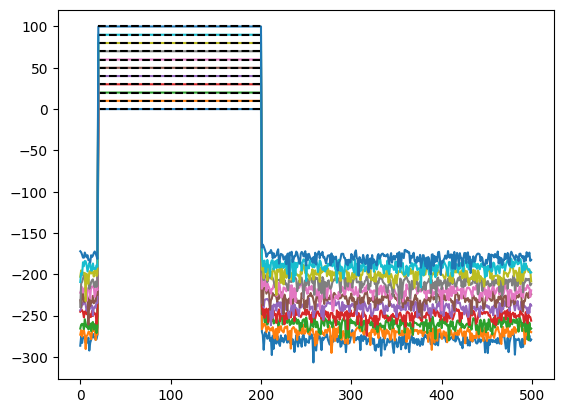

In [1]:
from data_creation.stimulus.noise import broadband_noise
from data_creation.time.time import generate_time_vector
from data_creation.calibration.transform import spl2a
from data_creation.calibration.spectrum import get_spectrum, spectrum_level

import numpy as np

import matplotlib.pyplot as plt


fig = plt.figure()
fs = 1000
fr = [20, 200]
eps = 1e-16
t = generate_time_vector(0.0, 1.0, fs)
for lvl in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    x = broadband_noise(t, amp=spl2a(lvl), freq_range=fr)
    f, X = get_spectrum(t, x)
    spectrumLevel = spectrum_level(f, X, fr)

    plt.plot(f, X, label=f'{lvl}')
    plt.plot(fr, np.ones(2)*spectrumLevel, 'k--')
    print(f'Target: {lvl},  \tSpectrum Level: {round(spectrumLevel, 4)}')

plt.show()

## White Noise

The following example is approaching the same result as above, but using a random-number generator as source and

### Uniform White noise

Here, using the uniform white noise generator

Target: 0,  	Spectrum Level: -0.0007
Target: 10,  	Spectrum Level: 10.0002
Target: 20,  	Spectrum Level: 20.0001
Target: 30,  	Spectrum Level: 29.9998
Target: 40,  	Spectrum Level: 40.0003
Target: 50,  	Spectrum Level: 49.9997
Target: 60,  	Spectrum Level: 59.9998
Target: 70,  	Spectrum Level: 70.0001
Target: 80,  	Spectrum Level: 80.0005
Target: 90,  	Spectrum Level: 90.0005
Target: 100,  	Spectrum Level: 100.0


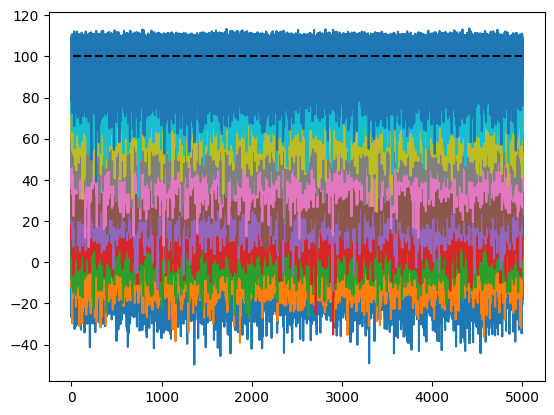

In [2]:
from data_creation.stimulus.noise import white_noise, uniform_white_noise_generator
from data_creation.time.time import generate_time_vector
from data_creation.calibration.transform import spl2a
from data_creation.calibration.spectrum import get_spectrum, spectrum_level

import numpy as np

import matplotlib.pyplot as plt


fig = plt.figure()
fs = 10000
fr = [20, fs // 2]
t = generate_time_vector(0.0, 60.0, fs)
for lvl in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    x = white_noise(t, amp=spl2a(lvl), generator=uniform_white_noise_generator)
    f, X = get_spectrum(t, x)
    spectrumLevel = spectrum_level(f, X, fr)

    plt.plot(f, X, label=f'{lvl}')
    plt.plot(fr, np.ones(2)*spectrumLevel, 'k--')
    print(f'Target: {lvl},  \tSpectrum Level: {round(spectrumLevel, 4)}')

plt.show()

Target: 0,  	Spectrum Level: -0.0002
Target: 10,  	Spectrum Level: 10.0007
Target: 20,  	Spectrum Level: 19.9996
Target: 30,  	Spectrum Level: 29.9995
Target: 40,  	Spectrum Level: 40.0004
Target: 50,  	Spectrum Level: 49.9998
Target: 60,  	Spectrum Level: 60.0003
Target: 70,  	Spectrum Level: 70.0002
Target: 80,  	Spectrum Level: 79.9999
Target: 90,  	Spectrum Level: 89.9998
Target: 100,  	Spectrum Level: 100.0013


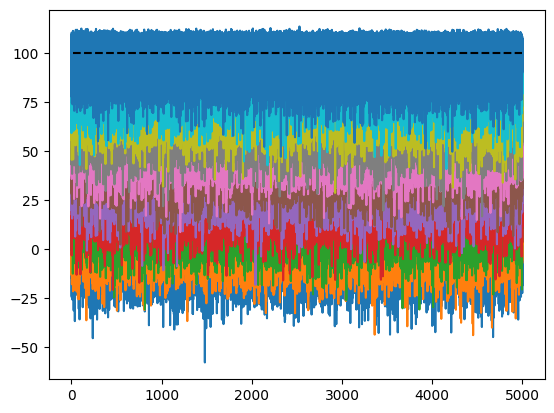

In [3]:
from data_creation.stimulus.noise import white_noise, normal_distributed_white_noise_generator

import numpy as np

import matplotlib.pyplot as plt


fig = plt.figure()
fs = 10000
fr = [20, fs // 2]
t = generate_time_vector(0.0, 60.0, fs)
for lvl in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    x = white_noise(t, amp=spl2a(lvl), generator=normal_distributed_white_noise_generator)
    f, X = get_spectrum(t, x)
    spectrumLevel = spectrum_level(f, X, fr)

    plt.plot(f, X, label=f'{lvl}')
    plt.plot(fr, np.ones(2)*spectrumLevel, 'k--')
    print(f'Target: {lvl},  \tSpectrum Level: {round(spectrumLevel, 4)}')

plt.show()